## Putting Data on a Map

Often, we want to put data in a `pandas` dataframe directly on a map - here's how!

In [1]:
import xarray as xr
import numpy as np
import ptolemy as pt
import pandas as pd

In [2]:
ds = xr.tutorial.load_dataset("air_temperature")
ds['lon'] = ds.lon - 360 # change from degrees_east to centered at prime meridian
grid = ds.air.isel(time=1)
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson"

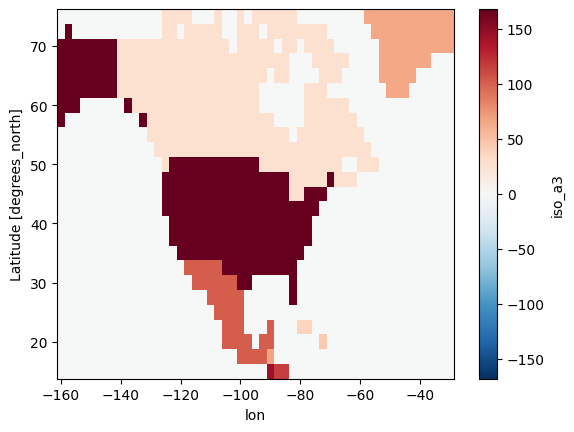

In [3]:
r = pt.Rasterize(like=grid)
r.read_shpf(url, idxkey="iso_a3")
idxr = r.rasterize(strategy="majority", verbose=True)
idxr.plot()

In [4]:
idx_map = {v: int(k) for k, v in idxr.attrs.items() if int(k) in np.unique(idxr)}
idx_map

{'CAN': 27,
 'CUB': 37,
 'DOM': 44,
 'GRL': 65,
 'GTM': 66,
 'MEX': 102,
 'NIC': 116,
 'SLV': 144,
 'USA': 168}

In [5]:
df = pd.DataFrame({
    "iso_a3": ['USA'] * 2 + ['MEX'] * 2,
    "year": [2015, 2020] * 2,
    "data": [15, 20, 5, 10],
})
df

,iso_a3,year,data
0,USA,2015,15
1,USA,2020,20
2,MEX,2015,5
3,MEX,2020,10


In [6]:
ds = pt.df_to_raster(df, idxr, 'iso_a3', idx_map, coords=['year'])
ds

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, year: 2)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 -160.0 -157.5 -155.0 -152.5 ... -35.0 -32.5 -30.0
  * year     (year) int64 2015 2020
Data variables:
    data     (lat, lon, year) float64 nan nan nan nan nan ... nan nan nan nan

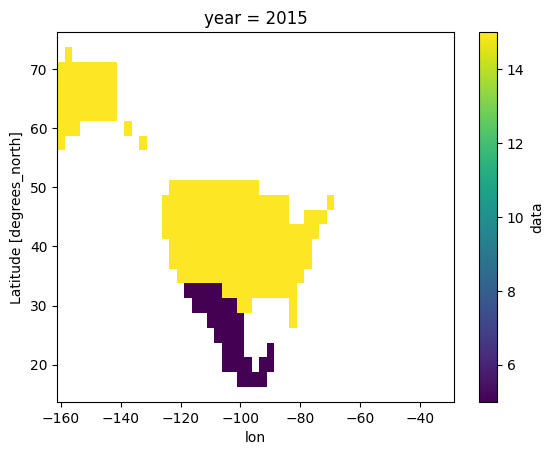

In [7]:
ds.data.sel(year=2015).plot()

## Getting data from a map (Zonal Statistics)

Using the tools developed so far, we can also get data corresponding to different shape areas (i.e., zonal statistics). For that, we need to provide the data to extract and mapping information from the index rasters.

In [8]:
pt.raster_to_df(ds.data.sel(year=2015), idxr, idxr.attrs)

CAN     NaN
CUB     NaN
DOM     NaN
GRL     NaN
GTM     NaN
MEX     5.0
NIC     NaN
SLV     NaN
USA    15.0
dtype: float64

In [9]:
pt.raster_to_df(ds.data.sel(year=2015), idxr, idxr.attrs, func=np.sum)

CAN       NaN
CUB       NaN
DOM       NaN
GRL       NaN
GTM       NaN
MEX     170.0
NIC       NaN
SLV       NaN
USA    2685.0
dtype: float64

In [10]:
pt.raster_to_df(ds.data.sel(year=2015), idxr, idxr.attrs, func=np.median)

CAN     NaN
CUB     NaN
DOM     NaN
GRL     NaN
GTM     NaN
MEX     5.0
NIC     NaN
SLV     NaN
USA    15.0
dtype: float64